## Keras - Regression

#### Boston House Price

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

print(tf.__version__)

1.11.0


In [2]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffling the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

`np.argsort(a, axis=-1, kind='quicksort', order=None)`
- Perform an indirect sort along the given axis using the algorithm specified by the `kind` keyword. 
- Returns an array of indices of the same shape as `a` that index data along the given axis in sorted order.

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


The dataset contains 13 different features:

1.   Per capita crime rate.
2.   The proportion of residential land zoned for lots over 25,000 square feet.
3.   The proportion of non-retail business acres per town.
4.   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5.   Nitric oxides concentration (parts per 10 million).
6.   The average number of rooms per dwelling.
7.   The proportion of owner-occupied units built before 1940.
8.   Weighted distances to five Boston employment centers.
9.   Index of accessibility to radial highways.
10.  Full-value property-tax rate per \$10,000.
11.  Pupil-teacher ratio by town.
12.  $1000 * (Bk - 0.63) ** 2$ where $Bk$ is the proportion of Black people by town.
13.  Percentage lower status of the population.

#### Preprocess

**Normalize features** We first normalize features that use different scales and ranges. For each feature, we subtract the mean of the feature and divide by the standard deviation.

In [4]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

#### Build the model

In [5]:
model = keras.Sequential([
    
    # Input layer that takes in house data
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(train_data.shape[1],)),
    
    # Middle hidden
    keras.layers.Dense(64, activation=tf.nn.relu),
    
    # A single value in the output layer
    keras.layers.Dense(1)
])

In [6]:
model.compile(loss='mse', # Mean Square Error
              optimizer=tf.train.RMSPropOptimizer(0.001),
              metrics=['mae']) # Mean Absolute Error

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


[RMSProp algorithm](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)
- Robust
- Applicable to mini batch learning

#### Train the model

`verbose`: level of verboseness, 0=silence, 1=progress bar, 2=full info.

`callbacks`: list of callback functions applied during training.

In [10]:
class Info(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0: 
            print(epoch, "finished")
    
# Check if validation loss has improvement every 20 iterations.
# Stop if no significant improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=500,
                    validation_split=0.2, verbose=0, 
                    callbacks=[Info(), early_stop])

0 finished
10 finished
20 finished
30 finished
40 finished
50 finished
60 finished
70 finished
80 finished
90 finished
100 finished
110 finished
120 finished
130 finished


(0, 5)

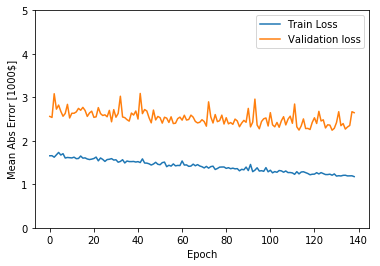

In [11]:
import matplotlib.pyplot as plt

plt.figure()

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [1000$]')

plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
       label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
       label = 'Validation loss')
plt.legend()
plt.ylim([0, 5]) 

In [12]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2622.13


#### Make Predictions

In [41]:
test_predictions = model.predict(test_data).flatten()

In [27]:
plt.xlim?

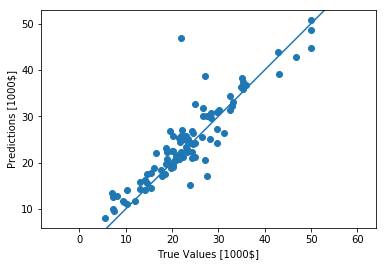

In [47]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')

# Set equal scaling on both axes
plt.axis('equal')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

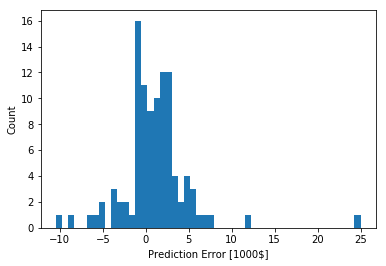

In [48]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")